In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [3]:
url= 'https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-3-2/'

In [4]:
article = []

b'<!doctype html >\r\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\r\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->\r\n<head>\r\n    <title>Rise of telemedicine and its Impact on Livelihood by 2040 | Blackcoffer Insights</title>\r\n    <meta charset="UTF-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="pingback" href="https://insights.blackcoffer.com/xmlrpc.php" />\r\n    <meta name=\'robots\' content=\'max-image-preview:large\' />\n<link rel=\'dns-prefetch\' href=\'//fonts.googleapis.com\' />\n<link rel="alternate" type="application/rss+xml" title="Blackcoffer Insights &raquo; Feed" href="https://insights.blackcoffer.com/feed/" />\n<link rel="alternate" type="application/rss+xml" title="Blackcoffer Insights &raquo; Comments Feed" href="https://insights.blackcoffer.com/comments/feed/" />\n<script type="text/javascript">\nwindow._wpemojiSetting
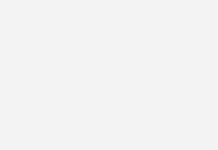
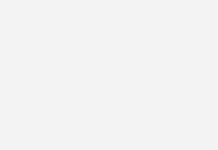
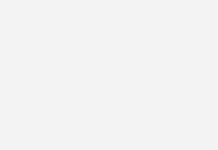
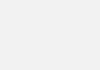
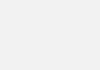
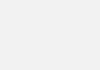
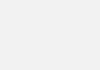
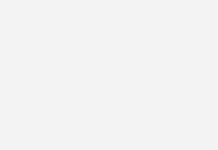
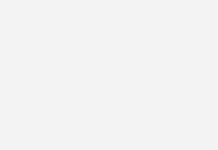
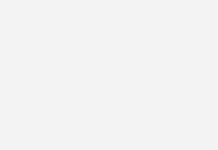
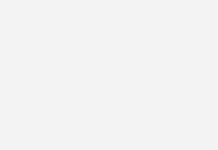

In [5]:
data= requests.get(url)
data.content

In [6]:
soup= BeautifulSoup(data.content, 'html.parser')

In [7]:
blog_articles = [{'blog_headline': headline.find('h1', attrs={'class':'entry-title'}).string,
                  'blog_article': article.find('div', attrs={'class': 'td-post-content tagdiv-type'}).text} 
                 for headline, article in zip(soup.find_all('div', class_ = ['td-container td-post-header']), 
                                              soup.find_all('div', class_=['td-ss-main-content']))]

In [8]:
article.extend(blog_articles)
article

[{'blog_headline': 'Rise of telemedicine and its Impact on Livelihood by 2040',
  'blog_article': '\nTelemedicine, the use of technology to diagnose and treat patients remotely, has been rising in recent years. With the advent of high-speed internet and improved video conferencing tools, healthcare providers are increasingly turning to telemedicine to provide care to patients in remote or underserved areas.\nTelemedicine, using technology to provide healthcare services remotely, has recently gained popularity. With advancements in communication and medical technology, it has become increasingly possible for doctors and patients to connect and interact from anywhere in the world. This has led to the rise of telemedicine, which has the potential to revolutionize the way healthcare is delivered.#Telemedicine\nThe increasing focus on preventative healthcare has also driven the rise of telemedicine. As more and more people become aware of the importance of staying healthy, they are looking 

In [9]:
df= pd.DataFrame(article)
df

,blog_headline,blog_article
0,Rise of telemedicine and its Impact on Livelih...,"\nTelemedicine, the use of technology to diagn..."


In [10]:
df[['blog_article']].to_string('123.txt', index=False)

## Removing Special Characters and Stopwords

In [11]:
StopWords_Auditor= open(r'D:\PGP- DSE\NLP\Blackcoffer\StopWords\StopWords_Auditor.txt','r').readlines()
StopWords_Currencies= open(r'D:\PGP- DSE\NLP\Blackcoffer\StopWords\StopWords_Currencies.txt','r').readlines()
StopWords_DatesandNumbers = open(r'D:\PGP- DSE\NLP\Blackcoffer\StopWords\StopWords_DatesandNumbers.txt','r').readlines()
StopWords_Generic= open(r'D:\PGP- DSE\NLP\Blackcoffer\StopWords\StopWords_Generic.txt','r').readlines()
StopWords_GenericLong= open(r'D:\PGP- DSE\NLP\Blackcoffer\StopWords\StopWords_GenericLong.txt','r').readlines()

In [12]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re

In [13]:
tokenizer = ToktokTokenizer()
stopword_list = StopWords_Auditor+StopWords_Currencies+StopWords_DatesandNumbers+StopWords_Generic+StopWords_GenericLong
stopword_list= [i.rstrip('\n') for i in stopword_list]

In [14]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [15]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [16]:
def normalize_corpus(corpus, text_lower_case=True, 
                     special_char_removal=True, stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    for doc in corpus:
        if special_char_removal:    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        doc = re.sub(' +', ' ', doc)
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        if text_lower_case:
            doc = doc.lower()
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [17]:
df['blog_article_cleaned']= normalize_corpus(df['blog_article'])

## Creating Dictionary

In [18]:
pos= open(r'D:\PGP- DSE\NLP\Blackcoffer\MasterDictionary\positive-words.txt','r').readlines()
pos= [i.rstrip('\n') for i in pos]
pos= [i if i not in stopword_list else pos.remove(i) for i in pos]

neg= open(r'D:\PGP- DSE\NLP\Blackcoffer\MasterDictionary\negative-words.txt','r').readlines()
neg= [i.rstrip('\n') for i in neg]
neg= [i if i not in stopword_list else neg.remove(i) for i in neg]

## Calculating Derived Variables

## Word Count

In [19]:
word_count= len(str(df['blog_article_cleaned'].values).split(' '))
word_count

918

In [20]:
total_words_before= len(str(df['blog_article'].values).split(' '))
total_words_before

1634

In [21]:
tokens = tokenizer.tokenize(df['blog_article_cleaned'].values[0])
tokens = [token.strip() for token in tokens]

In [22]:
pos_score= sum([1 if i in pos else 0 for i in tokens])
pos_score

80

In [23]:
neg_score= sum([-1 if i in neg else 0 for i in tokens])*-1
neg_score

24

In [24]:
polarity_score= (pos_score-neg_score)/((pos_score+neg_score) + 0.000001)
polarity_score

0.5384615332840237

In [25]:
subj_score= (pos_score+neg_score)/((word_count) + 0.000001)
subj_score

0.11328976022517455

## Analysis of readibility

In [26]:
num_of_sen= len(str(df['blog_article'].values).split('.'))
avg_sen_len= total_words_before/ num_of_sen
avg_sen_len

18.7816091954023

#### Let's create a function to count the number of complex words

In [27]:
def count_complex_words(text, num_vowels):
    def count_vowels(word):
        vowels = "AEIOUaeiou"
        return sum(1 for letter in word if letter in vowels)
    
    words = text.split()
    complex_word_count = 0
    
    for word in words:
        if count_vowels(word) > num_vowels:
            complex_word_count += 1
            
    return complex_word_count

In [28]:
num_complex_words= count_complex_words(df['blog_article'].values[0],2)
num_complex_words

597

In [29]:
percent_complex_words= (num_complex_words/ total_words_before)*100
percent_complex_words

36.536107711138314

In [30]:
fog_index= 0.4*(num_complex_words+percent_complex_words)
fog_index

253.41444308445534

## Average number of words per sentence

In [31]:
avg_sen_len

18.7816091954023

## Complex Word Count

In [32]:
num_complex_words

597

## Syllable count per word

In [33]:
syll_count= sum(1 for k in [i for i in df['blog_article'].values[0] if i in 'AEIOUaeiou' and (i[-1:-3]!='es' or i[-1:-3]!='ed')])
syll_count

3704

#### Let's create a function to count the number of syllables

In [34]:
def syllable_count(text):
    words= text.split()
    total_words= len(words)
    vowels= 'AEIOUaeiou'
    syll_count= 0
    for word in words:
        if word!= word.endswith('es') or word!= word.endswith('ed'):
            for i in word:
                if i in vowels:
                    syll_count= syll_count+1
    return syll_count             

In [35]:
syllable_count(df['blog_article'].values[0])

3704

In [36]:
syll_count_per_word= syll_count/ total_words_before
syll_count_per_word

2.266829865361077

#### Let's create a function to count the personal pronouns

In [37]:
def count_personal_pronouns(text):
    personal_pronouns = ["I", "me", "my", "mine", "myself",
                         "you", "your", "yours", "yourself",
                         "he", "him", "his", "himself",
                         "she", "her", "hers", "herself",
                         "it", "its", "itself",
                         "we", "us", "our", "ours", "ourselves",
                         "they", "them", "their", "theirs", "themselves"]
    
    pattern = r'\b(' + '|'.join(personal_pronouns) + r')\b'
    matches = re.findall(pattern, text, flags=re.IGNORECASE)
    us_count = text.count("US")
    total_count = len(matches) - us_count
    return total_count

In [38]:
count_personal_pronouns(df['blog_article'].values[0])

46

## Average word length

In [39]:
avg_word_len= len(df['blog_article'].values[0])/ total_words_before
avg_word_len

6.839045287637699

# Let's create a general function that does all the job and gives the requires number of variables

In [99]:
def variables_computation(url, url_id):
    print('url_Id(%s)'%(url_id))
    article= []
    data= requests.get(url)
    soup= BeautifulSoup(data.content, 'html.parser')
    blog_articles = [{'blog_headline': headline.find('h1', attrs={'class':'entry-title'}).string,
                  'blog_article': article.find('div', attrs={'class': 'td-post-content tagdiv-type'}).text} 
                 for headline, article in zip(soup.find_all('div', class_ = ['td-container td-post-header']), 
                                              soup.find_all('div', class_=['td-ss-main-content']))]
    article.extend(blog_articles)
    df= pd.DataFrame(article)
    df[['blog_article']].to_string('%s.txt'%(url_id), index=False)
    df['blog_article_cleaned']= normalize_corpus(df['blog_article'])
    
    tokens = tokenizer.tokenize(df['blog_article_cleaned'].values[0])
    tokens = [token.strip() for token in tokens]
    total_words_before= len(str(df['blog_article'].values).split(' '))
    word_count= len(str(df['blog_article_cleaned'].values).split(' '))
    pos_score= sum([1 if i in pos else 0 for i in tokens])
    print('Positive Score:', round(pos_score,4))
    neg_score= sum([-1 if i in neg else 0 for i in tokens])*-1
    print('Negative Score:', round(neg_score,4))
    polarity_score= (pos_score-neg_score)/((pos_score+neg_score) + 0.000001)
    print('Polarity Score:', round(polarity_score,2))
    subj_score= (pos_score+neg_score)/((word_count) + 0.000001)
    print('Subjectivity Score:', round(subj_score,2))
    num_of_sen= len(str(df['blog_article'].values).split('.'))
    avg_sen_len= total_words_before/ num_of_sen
    print('Average Sentence Length:', round(avg_sen_len,2))
    num_complex_words= count_complex_words(df['blog_article'].values[0],2)
    percent_complex_words= (num_complex_words/ total_words_before)*100
    print('Percentage of Complex Words:', round(percent_complex_words,2))
    fog_index= 0.4*(num_complex_words+percent_complex_words)
    print('Fog Index:', round(fog_index,2))
    print('Average Number of Words Per Sentence:',  round(avg_sen_len,2))
    print('Complex Word Count:', num_complex_words)
    print('Word count:', word_count)
    syll_count_per_word= syllable_count(df['blog_article'].values[0])/ total_words_before
    print('Syllable per Word:',round(syll_count_per_word,2))
    print('Personal Pronouns:', count_personal_pronouns(df['blog_article'].values[0]))
    avg_word_len= len(df['blog_article'].values[0])/ total_words_before
    print('Average Word Length:', round(avg_word_len,2))

In [100]:
variables_computation('https://insights.blackcoffer.com/rise-of-e-health-and-its-impact-on-humans-by-the-year-2030/',321)

url_Id(321)
Positive Score: 38
Negative Score: 13
Polarity Score: 0.49
Subjectivity Score: 0.17
Average Sentence Length: 24.28
Percentage of Complex Words: 35.58
Fog Index: 100.63
Average Number of Words Per Sentence: 24.28
Complex Word Count: 216
Word count: 304
Syllable per Word: 2.17
Personal Pronouns: 19
Average Word Length: 6.61


##### Let's create another function for 2345 url by finding and adjusting the classes of extracting dictionary, because it don't have the same class name as previous function 

In [105]:
def variables_computation2345(url, url_id):
    print('url_Id(%s)'%(url_id))
    article= []
    data= requests.get(url)
    soup= BeautifulSoup(data.content, 'html.parser')
    blog_articles = [{'blog_headline': soup.find('h1', attrs={'class':'tdb-title-text'}).string,
                  'blog_article': soup.find_all('div', attrs={'class': 'tdb-block-inner td-fix-index'})[14].text}]
    article.extend(blog_articles)
    df= pd.DataFrame(article)
    df[['blog_article']].to_string('%s.txt'%(url_id), index=False)
    df['blog_article_cleaned']= normalize_corpus(df['blog_article'])
    
    tokens = tokenizer.tokenize(df['blog_article_cleaned'].values[0])
    tokens = [token.strip() for token in tokens]
    total_words_before= len(str(df['blog_article'].values).split(' '))
    word_count= len(str(df['blog_article_cleaned'].values).split(' '))
    pos_score= sum([1 if i in pos else 0 for i in tokens])
    print('Positive Score:', round(pos_score,4))
    neg_score= sum([-1 if i in neg else 0 for i in tokens])*-1
    print('Negative Score:', round(neg_score,4))
    polarity_score= (pos_score-neg_score)/((pos_score+neg_score) + 0.000001)
    print('Polarity Score:', round(polarity_score,2))
    subj_score= (pos_score+neg_score)/((word_count) + 0.000001)
    print('Subjectivity Score:', round(subj_score,2))
    num_of_sen= len(str(df['blog_article'].values).split('.'))
    avg_sen_len= total_words_before/ num_of_sen
    print('Average Sentence Length:', round(avg_sen_len,2))
    num_complex_words= count_complex_words(df['blog_article'].values[0],2)
    percent_complex_words= (num_complex_words/ total_words_before)*100
    print('Percentage of Complex Words:', round(percent_complex_words,2))
    fog_index= 0.4*(num_complex_words+percent_complex_words)
    print('Fog Index:', round(fog_index,2))
    print('Average Number of Words Per Sentence:',  round(avg_sen_len,2))
    print('Complex Word Count:', num_complex_words)
    print('Word count:', word_count)
    syll_count_per_word= syllable_count(df['blog_article'].values[0])/ total_words_before
    print('Syllable per Word:',round(syll_count_per_word,2))
    print('Personal Pronouns:', count_personal_pronouns(df['blog_article'].values[0]))
    avg_word_len= len(df['blog_article'].values[0])/ total_words_before
    print('Average Word Length:', round(avg_word_len,2))

In [103]:
variables_computation2345('https://insights.blackcoffer.com/rise-of-e-health-and-its-imapct-on-humans-by-the-year-2030-2/', 2345)

url_Id(2345)
Positive Score: 21
Negative Score: 27
Polarity Score: -0.12
Subjectivity Score: 0.08
Average Sentence Length: 14.53
Percentage of Complex Words: 30.79
Fog Index: 144.72
Average Number of Words Per Sentence: 14.53
Complex Word Count: 331
Word count: 581 4
Syllable per Word: 2.01
Personal Pronouns: 22
Average Word Length: 6.47


In [56]:
variables_computation('https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-2/',4321)

url_Id(4321)
Positive Score: 35
Negative Score: 27
Polarity Score: 0.13
Subjectivity Score: 0.09
Average Sentence Length: 20.41
Percentage of Complex Words: 34.14
Fog Index: 178.05
Average Number of Words Per Sentence: 20.41
Complex Word Count: 411
Word count: 684
Syllable per Word: 2.15
Personal Pronouns: 32
Average Word Length: 6.79


In [57]:
variables_computation('https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-2-2/',432)

url_Id(432)
Positive Score: 35
Negative Score: 27
Polarity Score: 0.13
Subjectivity Score: 0.09
Average Sentence Length: 20.41
Percentage of Complex Words: 34.14
Fog Index: 178.05
Average Number of Words Per Sentence: 20.41
Complex Word Count: 411
Word count: 684
Syllable per Word: 2.15
Personal Pronouns: 32
Average Word Length: 6.79


In [58]:
variables_computation('https://insights.blackcoffer.com/rise-of-chatbots-and-its-impact-on-customer-support-by-the-year-2040/',2893.8)

url_Id(2893.8)
Positive Score: 48
Negative Score: 12
Polarity Score: 0.6
Subjectivity Score: 0.09
Average Sentence Length: 16.93
Percentage of Complex Words: 32.28
Fog Index: 159.31
Average Number of Words Per Sentence: 16.93
Complex Word Count: 366
Word count: 647
Syllable per Word: 2.12
Personal Pronouns: 33
Average Word Length: 6.76


In [596]:
variables_computation('https://insights.blackcoffer.com/rise-of-e-health-and-its-imapct-on-humans-by-the-year-2030/',3355.6)

url_Id(3355.6)
Positive Score: 33
Negative Score: 10
Polarity Score: 0.53
Subjectivity Score: 0.07
Average Sentence Length: 20.76
Percentage of Complex Words: 37.19
Fog Index: 169.27
Average Number of Words Per Sentence: 20.76
Complex Word Count: 386
Word count: 592
Syllable per Word: 2.19
Personal Pronouns: 14
Average Word Length: 6.88


In [597]:
variables_computation('https://insights.blackcoffer.com/how-does-marketing-influence-businesses-and-consumers/', 3817.4)

url_Id(3817.4)
Positive Score: 60
Negative Score: 6
Polarity Score: 0.82
Subjectivity Score: 0.07
Average Sentence Length: 17.5312
Percentage of Complex Words: 31.97
Fog Index: 227.99
Average Number of Words Per Sentence: 17.5312
Complex Word Count: 538
Word count: 919
Syllable per Word: 2.1
Personal Pronouns: 102
Average Word Length: 6.65


In [599]:
variables_computation2345('https://insights.blackcoffer.com/how-advertisement-increase-your-market-value/',4279.2)

url_Id(4279.2)
Positive Score: 8
Negative Score: 0
Polarity Score: 1.0
Subjectivity Score: 0.03
Average Sentence Length: 17.6333
Percentage of Complex Words: 24.2
Fog Index: 60.88
Average Number of Words Per Sentence: 17.6333
Complex Word Count: 128
Word count: 236
Syllable per Word: 1.88
Personal Pronouns: 33
Average Word Length: 6.27


In [600]:
variables_computation('https://insights.blackcoffer.com/negative-effects-of-marketing-on-society/', 4741)

url_Id(4741)
Positive Score: 23
Negative Score: 46
Polarity Score: -0.33
Subjectivity Score: 0.12
Average Sentence Length: 19.7843
Percentage of Complex Words: 36.67
Fog Index: 162.67
Average Number of Words Per Sentence: 19.7843
Complex Word Count: 370
Word count: 555
Syllable per Word: 2.18
Personal Pronouns: 30
Average Word Length: 6.8


In [601]:
variables_computation('https://insights.blackcoffer.com/how-advertisement-marketing-affects-business/', 5202.8)

url_Id(5202.8)
Positive Score: 13
Negative Score: 10
Polarity Score: 0.13
Subjectivity Score: 0.12
Average Sentence Length: 14.8214
Percentage of Complex Words: 25.3
Fog Index: 52.12
Average Number of Words Per Sentence: 14.8214
Complex Word Count: 105
Word count: 197
Syllable per Word: 1.92
Personal Pronouns: 17
Average Word Length: 6.17


In [602]:
variables_computation('https://insights.blackcoffer.com/rising-it-cities-will-impact-the-economy-environment-infrastructure-and-city-life-by-the-year-2035/',5664.6)

url_Id(5664.6)
Positive Score: 28
Negative Score: 16
Polarity Score: 0.27
Subjectivity Score: 0.06
Average Sentence Length: 21.3125
Percentage of Complex Words: 27.93
Fog Index: 163.57
Average Number of Words Per Sentence: 21.3125
Complex Word Count: 381
Word count: 693
Syllable per Word: 1.96
Personal Pronouns: 37
Average Word Length: 6.17


In [606]:
variables_computation('https://insights.blackcoffer.com/rise-of-ott-platform-and-its-impact-on-entertainment-industry-by-the-year-2030/', 6126.4)

url_Id(6126.4)
Positive Score: 23
Negative Score: 3
Polarity Score: 0.77
Subjectivity Score: 0.09
Average Sentence Length: 22.9167
Percentage of Complex Words: 33.27
Fog Index: 86.51
Average Number of Words Per Sentence: 22.9167
Complex Word Count: 183
Word count: 299
Syllable per Word: 2.04
Personal Pronouns: 10
Average Word Length: 6.54


In [607]:
variables_computation('https://insights.blackcoffer.com/rise-of-electric-vehicles-and-its-impact-on-livelihood-by-2040/',6588.2)

url_Id(6588.2)
Positive Score: 20
Negative Score: 11
Polarity Score: 0.29
Subjectivity Score: 0.06
Average Sentence Length: 25.55
Percentage of Complex Words: 23.09
Fog Index: 103.64
Average Number of Words Per Sentence: 25.55
Complex Word Count: 236
Word count: 528
Syllable per Word: 1.82
Personal Pronouns: 35
Average Word Length: 6.0


In [610]:
variables_computation('https://insights.blackcoffer.com/rise-of-electric-vehicle-and-its-impact-on-livelihood-by-the-year-2040/',7050)

url_Id(7050)
Positive Score: 23
Negative Score: 15
Polarity Score: 0.21
Subjectivity Score: 0.08
Average Sentence Length: 17.8367
Percentage of Complex Words: 30.21
Fog Index: 117.68
Average Number of Words Per Sentence: 17.8367
Complex Word Count: 264
Word count: 495
Syllable per Word: 2.01
Personal Pronouns: 17
Average Word Length: 6.48


In [611]:
variables_computation('https://insights.blackcoffer.com/oil-prices-by-the-year-2040-and-how-it-will-impact-the-world-economy/', 7511.8)

url_Id(7511.8)
Positive Score: 24
Negative Score: 26
Polarity Score: -0.04
Subjectivity Score: 0.08
Average Sentence Length: 24.0182
Percentage of Complex Words: 22.26
Fog Index: 126.5
Average Number of Words Per Sentence: 24.0182
Complex Word Count: 294
Word count: 592
Syllable per Word: 1.8
Personal Pronouns: 55
Average Word Length: 5.81


In [612]:
variables_computation('https://insights.blackcoffer.com/an-outlook-of-healthcare-by-the-year-2040-and-how-it-will-impact-human-lives/',7973.6)

url_Id(7973.6)
Positive Score: 35
Negative Score: 26
Polarity Score: 0.15
Subjectivity Score: 0.11
Average Sentence Length: 23.7174
Percentage of Complex Words: 29.61
Fog Index: 141.04
Average Number of Words Per Sentence: 23.7174
Complex Word Count: 323
Word count: 573
Syllable per Word: 2.04
Personal Pronouns: 34
Average Word Length: 6.58


In [614]:
variables_computation2345('https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/',8435.4)

url_Id(8435.4)
Positive Score: 64
Negative Score: 34
Polarity Score: 0.31
Subjectivity Score: 0.09
Average Sentence Length: 22.5256
Percentage of Complex Words: 35.91
Fog Index: 266.77
Average Number of Words Per Sentence: 22.5256
Complex Word Count: 631
Word count: 1070
Syllable per Word: 2.22
Personal Pronouns: 30
Average Word Length: 6.93


In [615]:
variables_computation('https://insights.blackcoffer.com/what-if-the-creation-is-taking-over-the-creator/',8897.2)

url_Id(8897.2)
Positive Score: 60
Negative Score: 37
Polarity Score: 0.24
Subjectivity Score: 0.15
Average Sentence Length: 19.6761
Percentage of Complex Words: 24.19
Fog Index: 144.88
Average Number of Words Per Sentence: 19.6761
Complex Word Count: 338
Word count: 664
Syllable per Word: 1.9
Personal Pronouns: 70
Average Word Length: 6.07


In [616]:
variables_computation('https://insights.blackcoffer.com/what-jobs-will-robots-take-from-humans-in-the-future/',9359)

url_Id(9359)
Positive Score: 66
Negative Score: 36
Polarity Score: 0.29
Subjectivity Score: 0.11
Average Sentence Length: 19.6824
Percentage of Complex Words: 34.13
Fog Index: 242.05
Average Number of Words Per Sentence: 19.6824
Complex Word Count: 571
Word count: 930
Syllable per Word: 2.15
Personal Pronouns: 39
Average Word Length: 6.65


In [617]:
variables_computation('https://insights.blackcoffer.com/will-machine-replace-the-human-in-the-future-of-work/',9820.8)

url_Id(9820.8)
Positive Score: 69
Negative Score: 28
Polarity Score: 0.42
Subjectivity Score: 0.12
Average Sentence Length: 19.506
Percentage of Complex Words: 24.09
Fog Index: 165.64
Average Number of Words Per Sentence: 19.506
Complex Word Count: 390
Word count: 777
Syllable per Word: 1.92
Personal Pronouns: 61
Average Word Length: 6.11


In [618]:
variables_computation('https://insights.blackcoffer.com/will-ai-replace-us-or-work-with-us/', 10282.6)

url_Id(10282.6)
Positive Score: 60
Negative Score: 26
Polarity Score: 0.4
Subjectivity Score: 0.1
Average Sentence Length: 20.8049
Percentage of Complex Words: 26.67
Fog Index: 192.67
Average Number of Words Per Sentence: 20.8049
Complex Word Count: 455
Word count: 874
Syllable per Word: 1.97
Personal Pronouns: 70
Average Word Length: 6.38


In [619]:
variables_computation('https://insights.blackcoffer.com/man-and-machines-together-machines-are-more-diligent-than-humans-blackcoffe/',10744.4)

url_Id(10744.4)
Positive Score: 45
Negative Score: 24
Polarity Score: 0.3
Subjectivity Score: 0.11
Average Sentence Length: 21.5424
Percentage of Complex Words: 26.44
Fog Index: 144.97
Average Number of Words Per Sentence: 21.5424
Complex Word Count: 336
Word count: 641
Syllable per Word: 1.96
Personal Pronouns: 78
Average Word Length: 6.31


In [620]:
variables_computation('https://insights.blackcoffer.com/in-future-or-in-upcoming-years-humans-and-machines-are-going-to-work-together-in-every-field-of-work/',11206.2)

url_Id(11206.2)
Positive Score: 26
Negative Score: 12
Polarity Score: 0.37
Subjectivity Score: 0.1
Average Sentence Length: 15.8478
Percentage of Complex Words: 25.79
Fog Index: 85.52
Average Number of Words Per Sentence: 15.8478
Complex Word Count: 188
Word count: 383
Syllable per Word: 1.94
Personal Pronouns: 24
Average Word Length: 6.31


In [627]:
variables_computation('https://insights.blackcoffer.com/how-machine-learning-will-affect-your-business/',12129.8)

url_Id(12129.8)
Positive Score: 37
Negative Score: 13
Polarity Score: 0.48
Subjectivity Score: 0.13
Average Sentence Length: 19.8611
Percentage of Complex Words: 23.64
Fog Index: 77.05
Average Number of Words Per Sentence: 19.8611
Complex Word Count: 169
Word count: 374
Syllable per Word: 1.88
Personal Pronouns: 43
Average Word Length: 6.05


In [633]:
variables_computation('https://insights.blackcoffer.com/deep-learning-impact-on-areas-of-e-learning/',12591.6)

url_Id(12591.6)
Positive Score: 68
Negative Score: 41
Polarity Score: 0.25
Subjectivity Score: 0.1
Average Sentence Length: 24.7674
Percentage of Complex Words: 26.81
Fog Index: 239.12
Average Number of Words Per Sentence: 24.7674
Complex Word Count: 571
Word count: 1059
Syllable per Word: 1.98
Personal Pronouns: 83
Average Word Length: 6.13


In [634]:
variables_computation('https://insights.blackcoffer.com/how-to-protect-future-data-and-its-privacy-blackcoffer/',13053.4)

url_Id(13053.4)
Positive Score: 49
Negative Score: 69
Polarity Score: -0.17
Subjectivity Score: 0.11
Average Sentence Length: 16.8261
Percentage of Complex Words: 28.27
Fog Index: 230.11
Average Number of Words Per Sentence: 16.8261
Complex Word Count: 547
Word count: 1083
Syllable per Word: 2.03
Personal Pronouns: 158
Average Word Length: 6.48


In [635]:
variables_computation('https://insights.blackcoffer.com/how-machines-ai-automations-and-robo-human-are-effective-in-finance-and-banking/',13515.2)

url_Id(13515.2)
Positive Score: 35
Negative Score: 22
Polarity Score: 0.23
Subjectivity Score: 0.09
Average Sentence Length: 21.0182
Percentage of Complex Words: 33.13
Fog Index: 166.45
Average Number of Words Per Sentence: 21.0182
Complex Word Count: 383
Word count: 648
Syllable per Word: 2.19
Personal Pronouns: 45
Average Word Length: 6.81


In [636]:
variables_computation('https://insights.blackcoffer.com/ai-human-robotics-machine-future-planet-blackcoffer-thinking-jobs-workplace/',13977)

url_Id(13977)
Positive Score: 31
Negative Score: 29
Polarity Score: 0.03
Subjectivity Score: 0.09
Average Sentence Length: 16.3514
Percentage of Complex Words: 27.11
Fog Index: 142.04
Average Number of Words Per Sentence: 16.3514
Complex Word Count: 328
Word count: 666
Syllable per Word: 1.98
Personal Pronouns: 26
Average Word Length: 6.28


In [637]:
variables_computation('https://insights.blackcoffer.com/how-ai-will-change-the-world-blackcoffer/',14438.8)

url_Id(14438.8)
Positive Score: 63
Negative Score: 24
Polarity Score: 0.45
Subjectivity Score: 0.12
Average Sentence Length: 20.9367
Percentage of Complex Words: 25.33
Fog Index: 177.73
Average Number of Words Per Sentence: 20.9367
Complex Word Count: 419
Word count: 755
Syllable per Word: 1.96
Personal Pronouns: 102
Average Word Length: 6.13


In [639]:
variables_computation2345('https://insights.blackcoffer.com/future-of-work-how-ai-has-entered-the-workplace/',14900.6)

url_Id(14900.6)
Positive Score: 76
Negative Score: 24
Polarity Score: 0.52
Subjectivity Score: 0.12
Average Sentence Length: 19.1325
Percentage of Complex Words: 28.4
Fog Index: 191.76
Average Number of Words Per Sentence: 19.1325
Complex Word Count: 451
Word count: 848
Syllable per Word: 2.06
Personal Pronouns: 49
Average Word Length: 6.45


In [640]:
variables_computation('https://insights.blackcoffer.com/ai-tool-alexa-google-assistant-finance-banking-tool-future/',15362.4)

url_Id(15362.4)
Positive Score: 26
Negative Score: 0
Polarity Score: 1.0
Subjectivity Score: 0.09
Average Sentence Length: 22.3182
Percentage of Complex Words: 33.6
Fog Index: 79.44
Average Number of Words Per Sentence: 22.3182
Complex Word Count: 165
Word count: 283
Syllable per Word: 2.2
Personal Pronouns: 13
Average Word Length: 6.75


In [641]:
variables_computation('https://insights.blackcoffer.com/ai-healthcare-revolution-ml-technology-algorithm-google-analytics-industrialrevolution/',15824.2)

url_Id(15824.2)
Positive Score: 79
Negative Score: 39
Polarity Score: 0.34
Subjectivity Score: 0.16
Average Sentence Length: 225.75
Percentage of Complex Words: 23.75
Fog Index: 181.1
Average Number of Words Per Sentence: 225.75
Complex Word Count: 429
Word count: 745
Syllable per Word: 1.85
Personal Pronouns: 75
Average Word Length: 5.84


In [642]:
variables_computation('https://insights.blackcoffer.com/all-you-need-to-know-about-online-marketing/',16286)

url_Id(16286)
Positive Score: 26
Negative Score: 0
Polarity Score: 1.0
Subjectivity Score: 0.05
Average Sentence Length: 16.3214
Percentage of Complex Words: 33.59
Fog Index: 136.24
Average Number of Words Per Sentence: 16.3214
Complex Word Count: 307
Word count: 518
Syllable per Word: 2.09
Personal Pronouns: 42
Average Word Length: 6.62


In [643]:
variables_computation('https://insights.blackcoffer.com/evolution-of-advertising-industry/',16747.8)

url_Id(16747.8)
Positive Score: 14
Negative Score: 6
Polarity Score: 0.4
Subjectivity Score: 0.05
Average Sentence Length: 16.4524
Percentage of Complex Words: 34.44
Fog Index: 108.98
Average Number of Words Per Sentence: 16.4524
Complex Word Count: 238
Word count: 391
Syllable per Word: 2.16
Personal Pronouns: 11
Average Word Length: 6.93


In [644]:
variables_computation('https://insights.blackcoffer.com/how-data-analytics-can-help-your-business-respond-to-the-impact-of-covid-19/',17209.6)

url_Id(17209.6)
Positive Score: 3
Negative Score: 4
Polarity Score: -0.14
Subjectivity Score: 0.04
Average Sentence Length: 22.5385
Percentage of Complex Words: 34.13
Fog Index: 53.65
Average Number of Words Per Sentence: 22.5385
Complex Word Count: 100
Word count: 160
Syllable per Word: 2.18
Personal Pronouns: 10
Average Word Length: 7.04


In [649]:
variables_computation('https://insights.blackcoffer.com/environmental-impact-of-the-covid-19-pandemic-lesson-for-the-future/',18133.2)

url_Id(18133.2)
Positive Score: 24
Negative Score: 69
Polarity Score: -0.48
Subjectivity Score: 0.13
Average Sentence Length: 23.4655
Percentage of Complex Words: 28.95
Fog Index: 169.18
Average Number of Words Per Sentence: 23.4655
Complex Word Count: 394
Word count: 721
Syllable per Word: 2.01
Personal Pronouns: 27
Average Word Length: 6.3


In [651]:
variables_computation('https://insights.blackcoffer.com/how-data-analytics-and-ai-are-used-to-halt-the-covid-19-pandemic/',18595)

url_Id(18595)
Positive Score: 17
Negative Score: 14
Polarity Score: 0.1
Subjectivity Score: 0.08
Average Sentence Length: 22.3125
Percentage of Complex Words: 25.77
Fog Index: 83.91
Average Number of Words Per Sentence: 22.3125
Complex Word Count: 184
Word count: 368
Syllable per Word: 1.92
Personal Pronouns: 20
Average Word Length: 6.15


In [652]:
variables_computation('https://insights.blackcoffer.com/difference-between-artificial-intelligence-machine-learning-statistics-and-data-mining/',19056.8)

url_Id(19056.8)
Positive Score: 58
Negative Score: 37
Polarity Score: 0.22
Subjectivity Score: 0.1
Average Sentence Length: 20.6848
Percentage of Complex Words: 23.8
Fog Index: 190.72
Average Number of Words Per Sentence: 20.6848
Complex Word Count: 453
Word count: 914
Syllable per Word: 1.91
Personal Pronouns: 63
Average Word Length: 6.11


In [653]:
variables_computation('https://insights.blackcoffer.com/how-python-became-the-first-choice-for-data-science/',19518.6)

url_Id(19518.6)
Positive Score: 40
Negative Score: 3
Polarity Score: 0.86
Subjectivity Score: 0.12
Average Sentence Length: 14.7273
Percentage of Complex Words: 29.78
Fog Index: 89.11
Average Number of Words Per Sentence: 14.7273
Complex Word Count: 193
Word count: 347
Syllable per Word: 2.03
Personal Pronouns: 27
Average Word Length: 6.52


In [654]:
variables_computation('https://insights.blackcoffer.com/how-google-fit-measure-heart-and-respiratory-rates-using-a-phone/',19980.4)

url_Id(19980.4)
Positive Score: 5
Negative Score: 1
Polarity Score: 0.67
Subjectivity Score: 0.03
Average Sentence Length: 21.8235
Percentage of Complex Words: 23.72
Fog Index: 44.69
Average Number of Words Per Sentence: 21.8235
Complex Word Count: 88
Word count: 205
Syllable per Word: 1.96
Personal Pronouns: 17
Average Word Length: 6.2


In [655]:
variables_computation('https://insights.blackcoffer.com/what-is-the-future-of-mobile-apps/',20442.2)

url_Id(20442.2)
Positive Score: 30
Negative Score: 9
Polarity Score: 0.54
Subjectivity Score: 0.06
Average Sentence Length: 21.8
Percentage of Complex Words: 26.61
Fog Index: 126.64
Average Number of Words Per Sentence: 21.8
Complex Word Count: 290
Word count: 627
Syllable per Word: 1.95
Personal Pronouns: 46
Average Word Length: 6.27


In [656]:
variables_computation('https://insights.blackcoffer.com/impact-of-ai-in-health-and-medicine/',20904)

url_Id(20904)
Positive Score: 25
Negative Score: 8
Polarity Score: 0.52
Subjectivity Score: 0.09
Average Sentence Length: 23.56
Percentage of Complex Words: 33.45
Fog Index: 92.18
Average Number of Words Per Sentence: 23.56
Complex Word Count: 197
Word count: 357
Syllable per Word: 2.24
Personal Pronouns: 9
Average Word Length: 6.94


In [657]:
variables_computation('https://insights.blackcoffer.com/telemedicine-what-patients-like-and-dislike-about-it/',21365.8)

url_Id(21365.8)
Positive Score: 15
Negative Score: 8
Polarity Score: 0.3
Subjectivity Score: 0.13
Average Sentence Length: 13.2069
Percentage of Complex Words: 25.59
Fog Index: 49.43
Average Number of Words Per Sentence: 13.2069
Complex Word Count: 98
Word count: 181
Syllable per Word: 2.03
Personal Pronouns: 16
Average Word Length: 6.36


In [658]:
variables_computation('https://insights.blackcoffer.com/how-we-forecast-future-technologies/',21827.6)

url_Id(21827.6)
Positive Score: 5
Negative Score: 0
Polarity Score: 1.0
Subjectivity Score: 0.05
Average Sentence Length: 16.0
Percentage of Complex Words: 31.87
Fog Index: 33.15
Average Number of Words Per Sentence: 16.0
Complex Word Count: 51
Word count: 96
Syllable per Word: 2.11
Personal Pronouns: 6
Average Word Length: 6.64


In [659]:
variables_computation('https://insights.blackcoffer.com/can-robots-tackle-late-life-loneliness/',22289.4)

url_Id(22289.4)
Positive Score: 23
Negative Score: 36
Polarity Score: -0.22
Subjectivity Score: 0.15
Average Sentence Length: 14.6364
Percentage of Complex Words: 20.62
Fog Index: 74.65
Average Number of Words Per Sentence: 14.6364
Complex Word Count: 166
Word count: 383
Syllable per Word: 1.84
Personal Pronouns: 101
Average Word Length: 5.91


In [660]:
variables_computation('https://insights.blackcoffer.com/embedding-care-robots-into-society-socio-technical-considerations/',22751.2)

url_Id(22751.2)
Positive Score: 9
Negative Score: 2
Polarity Score: 0.64
Subjectivity Score: 0.12
Average Sentence Length: 17.7
Percentage of Complex Words: 23.73
Fog Index: 26.29
Average Number of Words Per Sentence: 17.7
Complex Word Count: 42
Word count: 89
Syllable per Word: 1.9
Personal Pronouns: 9
Average Word Length: 6.01


In [663]:
variables_computation('https://insights.blackcoffer.com/management-challenges-for-future-digitalization-of-healthcare-services/',23213)

url_Id(23213)
Positive Score: 47
Negative Score: 19
Polarity Score: 0.42
Subjectivity Score: 0.1
Average Sentence Length: 16.1884
Percentage of Complex Words: 36.88
Fog Index: 179.55
Average Number of Words Per Sentence: 16.1884
Complex Word Count: 412
Word count: 660
Syllable per Word: 2.29
Personal Pronouns: 40
Average Word Length: 7.06


In [664]:
variables_computation('https://insights.blackcoffer.com/are-we-any-closer-to-preventing-a-nuclear-holocaust/',23674.8)

url_Id(23674.8)
Positive Score: 10
Negative Score: 18
Polarity Score: -0.29
Subjectivity Score: 0.1
Average Sentence Length: 16.9677
Percentage of Complex Words: 28.52
Fog Index: 71.41
Average Number of Words Per Sentence: 16.9677
Complex Word Count: 150
Word count: 278
Syllable per Word: 1.93
Personal Pronouns: 17
Average Word Length: 6.23


In [666]:
variables_computation('https://insights.blackcoffer.com/will-technology-eliminate-the-need-for-animal-testing-in-drug-development/',24136.6)

url_Id(24136.6)
Positive Score: 23
Negative Score: 37
Polarity Score: -0.23
Subjectivity Score: 0.12
Average Sentence Length: 20.9
Percentage of Complex Words: 23.83
Fog Index: 109.13
Average Number of Words Per Sentence: 20.9
Complex Word Count: 249
Word count: 507
Syllable per Word: 1.88
Personal Pronouns: 53
Average Word Length: 6.02


In [667]:
variables_computation('https://insights.blackcoffer.com/will-we-ever-understand-the-nature-of-consciousness/',24598.4)

url_Id(24598.4)
Positive Score: 25
Negative Score: 49
Polarity Score: -0.32
Subjectivity Score: 0.08
Average Sentence Length: 22.8108
Percentage of Complex Words: 30.81
Fog Index: 220.32
Average Number of Words Per Sentence: 22.8108
Complex Word Count: 520
Word count: 903
Syllable per Word: 2.11
Personal Pronouns: 58
Average Word Length: 6.63


In [668]:
variables_computation('https://insights.blackcoffer.com/will-we-ever-colonize-outer-space/',25060.2)

url_Id(25060.2)
Positive Score: 42
Negative Score: 23
Polarity Score: 0.29
Subjectivity Score: 0.08
Average Sentence Length: 23.9722
Percentage of Complex Words: 21.9
Fog Index: 159.96
Average Number of Words Per Sentence: 23.9722
Complex Word Count: 378
Word count: 792
Syllable per Word: 1.85
Personal Pronouns: 57
Average Word Length: 5.92


In [669]:
variables_computation('https://insights.blackcoffer.com/what-is-the-chance-homo-sapiens-will-survive-for-the-next-500-years/',25522)

url_Id(25522)
Positive Score: 34
Negative Score: 25
Polarity Score: 0.15
Subjectivity Score: 0.08
Average Sentence Length: 20.8261
Percentage of Complex Words: 23.52
Fog Index: 144.61
Average Number of Words Per Sentence: 20.8261
Complex Word Count: 338
Word count: 726
Syllable per Word: 1.88
Personal Pronouns: 57
Average Word Length: 6.06


In [670]:
variables_computation('https://insights.blackcoffer.com/why-does-your-business-need-a-chatbot/',25983.8)

url_Id(25983.8)
Positive Score: 25
Negative Score: 7
Polarity Score: 0.56
Subjectivity Score: 0.08
Average Sentence Length: 12.9552
Percentage of Complex Words: 22.24
Fog Index: 86.09
Average Number of Words Per Sentence: 12.9552
Complex Word Count: 193
Word count: 398
Syllable per Word: 1.77
Personal Pronouns: 77
Average Word Length: 5.81


In [671]:
variables_computation('https://insights.blackcoffer.com/how-you-lead-a-project-or-a-team-without-any-technical-expertise/',26445.6)

url_Id(26445.6)
Positive Score: 39
Negative Score: 7
Polarity Score: 0.7
Subjectivity Score: 0.08
Average Sentence Length: 24.2069
Percentage of Complex Words: 21.58
Fog Index: 129.83
Average Number of Words Per Sentence: 24.2069
Complex Word Count: 303
Word count: 579
Syllable per Word: 1.76
Personal Pronouns: 86
Average Word Length: 5.73


In [673]:
variables_computation('https://insights.blackcoffer.com/can-you-be-great-leader-without-technical-expertise/',26907.4)

url_Id(26907.4)
Positive Score: 30
Negative Score: 6
Polarity Score: 0.67
Subjectivity Score: 0.18
Average Sentence Length: 27.3529
Percentage of Complex Words: 24.52
Fog Index: 55.41
Average Number of Words Per Sentence: 27.3529
Complex Word Count: 114
Word count: 195
Syllable per Word: 1.9
Personal Pronouns: 31
Average Word Length: 5.84


In [674]:
variables_computation('https://insights.blackcoffer.com/how-does-artificial-intelligence-affect-the-environment/',27369.2)

url_Id(27369.2)
Positive Score: 39
Negative Score: 16
Polarity Score: 0.42
Subjectivity Score: 0.06
Average Sentence Length: 22.9559
Percentage of Complex Words: 29.85
Fog Index: 198.34
Average Number of Words Per Sentence: 22.9559
Complex Word Count: 466
Word count: 855
Syllable per Word: 2.06
Personal Pronouns: 32
Average Word Length: 6.4


In [675]:
variables_computation('https://insights.blackcoffer.com/how-to-overcome-your-fear-of-making-mistakes-2/',27831)

url_Id(27831)
Positive Score: 24
Negative Score: 73
Polarity Score: -0.51
Subjectivity Score: 0.21
Average Sentence Length: 13.7571
Percentage of Complex Words: 24.61
Fog Index: 104.64
Average Number of Words Per Sentence: 13.7571
Complex Word Count: 237
Word count: 467
Syllable per Word: 1.95
Personal Pronouns: 105
Average Word Length: 6.09


In [676]:
variables_computation('https://insights.blackcoffer.com/is-perfection-the-greatest-enemy-of-productivity/',28292.8)

url_Id(28292.8)
Positive Score: 55
Negative Score: 22
Polarity Score: 0.43
Subjectivity Score: 0.15
Average Sentence Length: 15.1644
Percentage of Complex Words: 17.71
Fog Index: 85.48
Average Number of Words Per Sentence: 15.1644
Complex Word Count: 196
Word count: 519
Syllable per Word: 1.74
Personal Pronouns: 112
Average Word Length: 5.77


In [677]:
variables_computation('https://insights.blackcoffer.com/global-financial-crisis-2008-causes-effects-and-its-solution/',28754.6)

url_Id(28754.6)
Positive Score: 27
Negative Score: 46
Polarity Score: -0.26
Subjectivity Score: 0.11
Average Sentence Length: 19.7627
Percentage of Complex Words: 22.21
Fog Index: 112.49
Average Number of Words Per Sentence: 19.7627
Complex Word Count: 259
Word count: 658
Syllable per Word: 1.86
Personal Pronouns: 20
Average Word Length: 6.2


In [678]:
variables_computation('https://insights.blackcoffer.com/gender-diversity-and-equality-in-the-tech-industry/',29216.4)

url_Id(29216.4)
Positive Score: 31
Negative Score: 26
Polarity Score: 0.09
Subjectivity Score: 0.07
Average Sentence Length: 14.7128
Percentage of Complex Words: 29.07
Fog Index: 172.43
Average Number of Words Per Sentence: 14.7128
Complex Word Count: 402
Word count: 764
Syllable per Word: 2.08
Personal Pronouns: 45
Average Word Length: 6.61


In [679]:
variables_computation('https://insights.blackcoffer.com/how-to-overcome-your-fear-of-making-mistakes/',29678.2)

url_Id(29678.2)
Positive Score: 24
Negative Score: 81
Polarity Score: -0.54
Subjectivity Score: 0.21
Average Sentence Length: 14.0833
Percentage of Complex Words: 25.44
Fog Index: 113.38
Average Number of Words Per Sentence: 14.0833
Complex Word Count: 258
Word count: 496
Syllable per Word: 1.96
Personal Pronouns: 108
Average Word Length: 6.14


In [680]:
variables_computation('https://insights.blackcoffer.com/how-small-business-can-survive-the-coronavirus-crisis/',30140)

url_Id(30140)
Positive Score: 40
Negative Score: 35
Polarity Score: 0.07
Subjectivity Score: 0.1
Average Sentence Length: 23.1642
Percentage of Complex Words: 23.2
Fog Index: 153.28
Average Number of Words Per Sentence: 23.1642
Complex Word Count: 360
Word count: 755
Syllable per Word: 1.82
Personal Pronouns: 72
Average Word Length: 6.0


In [681]:
variables_computation('https://insights.blackcoffer.com/impacts-of-covid-19-on-vegetable-vendors-and-food-stalls/',30601.8)

url_Id(30601.8)
Positive Score: 23
Negative Score: 13
Polarity Score: 0.28
Subjectivity Score: 0.09
Average Sentence Length: 27.9259
Percentage of Complex Words: 24.8
Fog Index: 84.72
Average Number of Words Per Sentence: 27.9259
Complex Word Count: 187
Word count: 403
Syllable per Word: 1.98
Personal Pronouns: 12
Average Word Length: 6.37


In [682]:
variables_computation('https://insights.blackcoffer.com/impacts-of-covid-19-on-vegetable-vendors/',31063.6)

url_Id(31063.6)
Positive Score: 36
Negative Score: 25
Polarity Score: 0.18
Subjectivity Score: 0.09
Average Sentence Length: 29.375
Percentage of Complex Words: 27.66
Fog Index: 141.06
Average Number of Words Per Sentence: 29.375
Complex Word Count: 325
Word count: 657
Syllable per Word: 2.04
Personal Pronouns: 17
Average Word Length: 6.58


In [683]:
variables_computation('https://insights.blackcoffer.com/impact-of-covid-19-pandemic-on-tourism-aviation-industries/',31525.4)

url_Id(31525.4)
Positive Score: 32
Negative Score: 52
Polarity Score: -0.24
Subjectivity Score: 0.1
Average Sentence Length: 20.7375
Percentage of Complex Words: 28.51
Fog Index: 200.6
Average Number of Words Per Sentence: 20.7375
Complex Word Count: 473
Word count: 869
Syllable per Word: 2.01
Personal Pronouns: 49
Average Word Length: 6.39


In [684]:
variables_computation('https://insights.blackcoffer.com/impact-of-covid-19-pandemic-on-sports-events-around-the-world/',31987.2)

url_Id(31987.2)
Positive Score: 36
Negative Score: 11
Polarity Score: 0.53
Subjectivity Score: 0.02
Average Sentence Length: 13.0323
Percentage of Complex Words: 26.11
Fog Index: 348.05
Average Number of Words Per Sentence: 13.0323
Complex Word Count: 844
Word count: 2050
Syllable per Word: 1.88
Personal Pronouns: 24
Average Word Length: 6.44


In [685]:
variables_computation('https://insights.blackcoffer.com/changing-landscape-and-emerging-trends-in-the-indian-it-ites-industry/',32449)

url_Id(32449)
Positive Score: 36
Negative Score: 49
Polarity Score: -0.15
Subjectivity Score: 0.1
Average Sentence Length: 20.8675
Percentage of Complex Words: 26.73
Fog Index: 195.89
Average Number of Words Per Sentence: 20.8675
Complex Word Count: 463
Word count: 876
Syllable per Word: 1.96
Personal Pronouns: 64
Average Word Length: 6.22


In [686]:
variables_computation('https://insights.blackcoffer.com/online-gaming-adolescent-online-gaming-effects-demotivated-depression-musculoskeletal-and-psychosomatic-symptoms/',32910.8)

url_Id(32910.8)
Positive Score: 28
Negative Score: 69
Polarity Score: -0.42
Subjectivity Score: 0.11
Average Sentence Length: 23.9355
Percentage of Complex Words: 35.71
Fog Index: 226.29
Average Number of Words Per Sentence: 23.9355
Complex Word Count: 530
Word count: 858
Syllable per Word: 2.18
Personal Pronouns: 20
Average Word Length: 6.73


In [106]:
variables_computation2345('https://insights.blackcoffer.com/human-rights-outlook/',33372.6)

url_Id(33372.6)
Positive Score: 3
Negative Score: 3
Polarity Score: 0.0
Subjectivity Score: 0.08
Average Sentence Length: 19.38
Percentage of Complex Words: 23.87
Fog Index: 24.35
Average Number of Words Per Sentence: 19.38
Complex Word Count: 37
Word count: 75
Syllable per Word: 2.01
Personal Pronouns: 11
Average Word Length: 6.3


In [107]:
variables_computation2345('https://insights.blackcoffer.com/how-voice-search-makes-your-business-a-successful-business/',33834.4)

url_Id(33834.4)
Positive Score: 33
Negative Score: 4
Polarity Score: 0.78
Subjectivity Score: 0.08
Average Sentence Length: 20.2
Percentage of Complex Words: 26.26
Fog Index: 108.11
Average Number of Words Per Sentence: 20.2
Complex Word Count: 244
Word count: 456
Syllable per Word: 1.93
Personal Pronouns: 43
Average Word Length: 6.3


In [108]:
variables_computation('https://insights.blackcoffer.com/how-the-covid-19-crisis-is-redefining-jobs-and-services/',34296.2)

url_Id(34296.2)
Positive Score: 37
Negative Score: 33
Polarity Score: 0.06
Subjectivity Score: 0.09
Average Sentence Length: 15.33
Percentage of Complex Words: 23.05
Fog Index: 176.02
Average Number of Words Per Sentence: 15.33
Complex Word Count: 417
Word count: 819
Syllable per Word: 1.89
Personal Pronouns: 62
Average Word Length: 6.09


In [109]:
variables_computation('https://insights.blackcoffer.com/how-to-increase-social-media-engagement-for-marketers/',34758)

url_Id(34758)
Positive Score: 55
Negative Score: 16
Polarity Score: 0.55
Subjectivity Score: 0.08
Average Sentence Length: 19.2
Percentage of Complex Words: 29.37
Fog Index: 212.55
Average Number of Words Per Sentence: 19.2
Complex Word Count: 502
Word count: 908
Syllable per Word: 1.98
Personal Pronouns: 84
Average Word Length: 6.4


In [110]:
variables_computation('https://insights.blackcoffer.com/impacts-of-covid-19-on-streets-sides-food-stalls/',35219.8)

url_Id(35219.8)
Positive Score: 30
Negative Score: 33
Polarity Score: -0.05
Subjectivity Score: 0.12
Average Sentence Length: 22.28
Percentage of Complex Words: 25.69
Fog Index: 117.88
Average Number of Words Per Sentence: 22.28
Complex Word Count: 269
Word count: 544
Syllable per Word: 1.95
Personal Pronouns: 38
Average Word Length: 6.25


In [111]:
variables_computation('https://insights.blackcoffer.com/coronavirus-impact-on-energy-markets-2/',35681.6)

url_Id(35681.6)
Positive Score: 15
Negative Score: 44
Polarity Score: -0.49
Subjectivity Score: 0.06
Average Sentence Length: 21.95
Percentage of Complex Words: 29.12
Fog Index: 213.65
Average Number of Words Per Sentence: 21.95
Complex Word Count: 505
Word count: 981
Syllable per Word: 2.01
Personal Pronouns: 14
Average Word Length: 6.64


In [112]:
variables_computation('https://insights.blackcoffer.com/coronavirus-impact-on-the-hospitality-industry-5/',36143.4)

url_Id(36143.4)
Positive Score: 16
Negative Score: 42
Polarity Score: -0.45
Subjectivity Score: 0.12
Average Sentence Length: 19.33
Percentage of Complex Words: 25.77
Fog Index: 107.91
Average Number of Words Per Sentence: 19.33
Complex Word Count: 244
Word count: 490
Syllable per Word: 1.95
Personal Pronouns: 29
Average Word Length: 6.32


In [113]:
variables_computation('https://insights.blackcoffer.com/lessons-from-the-past-some-key-learnings-relevant-to-the-coronavirus-crisis-4/',36605.2)

url_Id(36605.2)
Positive Score: 36
Negative Score: 47
Polarity Score: -0.13
Subjectivity Score: 0.14
Average Sentence Length: 16.71
Percentage of Complex Words: 24.52
Fog Index: 127.81
Average Number of Words Per Sentence: 16.71
Complex Word Count: 295
Word count: 573
Syllable per Word: 1.9
Personal Pronouns: 67
Average Word Length: 5.97


In [114]:
variables_computation('https://insights.blackcoffer.com/estimating-the-impact-of-covid-19-on-the-world-of-work-2/',37067)

url_Id(37067)
Positive Score: 23
Negative Score: 27
Polarity Score: -0.08
Subjectivity Score: 0.1
Average Sentence Length: 28.66
Percentage of Complex Words: 25.9
Fog Index: 123.16
Average Number of Words Per Sentence: 28.66
Complex Word Count: 282
Word count: 519
Syllable per Word: 1.92
Personal Pronouns: 43
Average Word Length: 6.09


In [116]:
variables_computation2345('https://insights.blackcoffer.com/estimating-the-impact-of-covid-19-on-the-world-of-work-3/',37528.8)

url_Id(37528.8)
Positive Score: 20
Negative Score: 44
Polarity Score: -0.37
Subjectivity Score: 0.08
Average Sentence Length: 17.92
Percentage of Complex Words: 30.26
Fog Index: 155.3
Average Number of Words Per Sentence: 17.92
Complex Word Count: 358
Word count: 780
Syllable per Word: 2.13
Personal Pronouns: 15
Average Word Length: 6.9


In [117]:
variables_computation('https://insights.blackcoffer.com/travel-and-tourism-outlook/',37990.6)

url_Id(37990.6)
Positive Score: 4
Negative Score: 3
Polarity Score: 0.14
Subjectivity Score: 0.08
Average Sentence Length: 19.67
Percentage of Complex Words: 21.47
Fog Index: 23.79
Average Number of Words Per Sentence: 19.67
Complex Word Count: 38
Word count: 85
Syllable per Word: 1.86
Personal Pronouns: 11
Average Word Length: 6.02


In [118]:
variables_computation('https://insights.blackcoffer.com/gaming-disorder-and-effects-of-gaming-on-health/',38452.4)

url_Id(38452.4)
Positive Score: 28
Negative Score: 45
Polarity Score: -0.23
Subjectivity Score: 0.13
Average Sentence Length: 18.37
Percentage of Complex Words: 24.72
Fog Index: 117.09
Average Number of Words Per Sentence: 18.37
Complex Word Count: 268
Word count: 566
Syllable per Word: 1.89
Personal Pronouns: 79
Average Word Length: 6.03


In [119]:
variables_computation('https://insights.blackcoffer.com/what-is-the-repercussion-of-the-environment-due-to-the-covid-19-pandemic-situation/',38914.2)

url_Id(38914.2)
Positive Score: 8
Negative Score: 25
Polarity Score: -0.52
Subjectivity Score: 0.1
Average Sentence Length: 17.79
Percentage of Complex Words: 27.11
Fog Index: 76.44
Average Number of Words Per Sentence: 17.79
Complex Word Count: 164
Word count: 335
Syllable per Word: 1.96
Personal Pronouns: 16
Average Word Length: 6.42


In [120]:
variables_computation('https://insights.blackcoffer.com/what-is-the-repercussion-of-the-environment-due-to-the-covid-19-pandemic-situation-2/',39376)

url_Id(39376)
Positive Score: 27
Negative Score: 57
Polarity Score: -0.36
Subjectivity Score: 0.14
Average Sentence Length: 20.98
Percentage of Complex Words: 28.69
Fog Index: 139.07
Average Number of Words Per Sentence: 20.98
Complex Word Count: 319
Word count: 607
Syllable per Word: 2.01
Personal Pronouns: 8
Average Word Length: 6.41


In [121]:
variables_computation('https://insights.blackcoffer.com/impact-of-covid-19-pandemic-on-office-space-and-co-working-industries/',39837.8)

url_Id(39837.8)
Positive Score: 21
Negative Score: 35
Polarity Score: -0.25
Subjectivity Score: 0.12
Average Sentence Length: 27.31
Percentage of Complex Words: 22.82
Fog Index: 106.33
Average Number of Words Per Sentence: 27.31
Complex Word Count: 243
Word count: 448
Syllable per Word: 1.84
Personal Pronouns: 47
Average Word Length: 5.9


In [122]:
variables_computation('https://insights.blackcoffer.com/contribution-of-handicrafts-visual-arts-literature-in-the-indian-economy/',40299.6)

url_Id(40299.6)
Positive Score: 6
Negative Score: 3
Polarity Score: 0.33
Subjectivity Score: 0.04
Average Sentence Length: 15.04
Percentage of Complex Words: 34.84
Fog Index: 66.34
Average Number of Words Per Sentence: 15.04
Complex Word Count: 131
Word count: 244
Syllable per Word: 2.1
Personal Pronouns: 7
Average Word Length: 6.89


In [124]:
variables_computation2345('https://insights.blackcoffer.com/how-covid-19-is-impacting-payment-preferences/',40761.4)

url_Id(40761.4)
Positive Score: 16
Negative Score: 3
Polarity Score: 0.68
Subjectivity Score: 0.06
Average Sentence Length: 16.89
Percentage of Complex Words: 20.64
Fog Index: 57.06
Average Number of Words Per Sentence: 16.89
Complex Word Count: 122
Word count: 314
Syllable per Word: 1.81
Personal Pronouns: 17
Average Word Length: 6.06


In [126]:
variables_computation2345('https://insights.blackcoffer.com/how-will-covid-19-affect-the-world-of-work-2/',41223.2)

url_Id(41223.2)
Positive Score: 30
Negative Score: 57
Polarity Score: -0.31
Subjectivity Score: 0.16
Average Sentence Length: 29.0
Percentage of Complex Words: 29.56
Fog Index: 131.82
Average Number of Words Per Sentence: 29.0
Complex Word Count: 300
Word count: 548
Syllable per Word: 2.06
Personal Pronouns: 15
Average Word Length: 6.62


In [128]:
variables_computation('https://insights.blackcoffer.com/lessons-from-the-past-some-key-learnings-relevant-to-the-coronavirus-crisis/',41685)

url_Id(41685)
Positive Score: 28
Negative Score: 24
Polarity Score: 0.08
Subjectivity Score: 0.18
Average Sentence Length: 22.77
Percentage of Complex Words: 14.31
Fog Index: 46.12
Average Number of Words Per Sentence: 22.77
Complex Word Count: 101
Word count: 287
Syllable per Word: 1.66
Personal Pronouns: 71
Average Word Length: 5.43


In [129]:
variables_computation('https://insights.blackcoffer.com/covid-19-how-have-countries-been-responding/',42146.8)

url_Id(42146.8)
Positive Score: 6
Negative Score: 38
Polarity Score: -0.73
Subjectivity Score: 0.08
Average Sentence Length: 20.02
Percentage of Complex Words: 28.87
Fog Index: 127.15
Average Number of Words Per Sentence: 20.02
Complex Word Count: 289
Word count: 580
Syllable per Word: 2.04
Personal Pronouns: 5
Average Word Length: 6.62


In [130]:
variables_computation('https://insights.blackcoffer.com/coronavirus-impact-on-the-hospitality-industry-2/',42608.6)

url_Id(42608.6)
Positive Score: 14
Negative Score: 33
Polarity Score: -0.4
Subjectivity Score: 0.09
Average Sentence Length: 19.44
Percentage of Complex Words: 27.7
Fog Index: 123.08
Average Number of Words Per Sentence: 19.44
Complex Word Count: 280
Word count: 515
Syllable per Word: 2.07
Personal Pronouns: 30
Average Word Length: 6.52


In [132]:
variables_computation2345('https://insights.blackcoffer.com/how-will-covid-19-affect-the-world-of-work-3/',43070.4)

url_Id(43070.4)
Positive Score: 26
Negative Score: 52
Polarity Score: -0.33
Subjectivity Score: 0.14
Average Sentence Length: 19.63
Percentage of Complex Words: 29.77
Fog Index: 131.11
Average Number of Words Per Sentence: 19.63
Complex Word Count: 298
Word count: 562
Syllable per Word: 2.05
Personal Pronouns: 24
Average Word Length: 6.57


In [133]:
variables_computation('https://insights.blackcoffer.com/coronavirus-impact-on-the-hospitality-industry-3/',43532.2)

url_Id(43532.2)
Positive Score: 24
Negative Score: 36
Polarity Score: -0.2
Subjectivity Score: 0.09
Average Sentence Length: 22.04
Percentage of Complex Words: 26.99
Fog Index: 143.99
Average Number of Words Per Sentence: 22.04
Complex Word Count: 333
Word count: 660
Syllable per Word: 1.93
Personal Pronouns: 29
Average Word Length: 6.32


In [134]:
variables_computation('https://insights.blackcoffer.com/estimating-the-impact-of-covid-19-on-the-world-of-work/',43994)

url_Id(43994)
Positive Score: 47
Negative Score: 48
Polarity Score: -0.01
Subjectivity Score: 0.12
Average Sentence Length: 20.95
Percentage of Complex Words: 23.87
Fog Index: 157.55
Average Number of Words Per Sentence: 20.95
Complex Word Count: 370
Word count: 778
Syllable per Word: 1.87
Personal Pronouns: 37
Average Word Length: 6.01


In [135]:
variables_computation('https://insights.blackcoffer.com/covid-19-how-have-countries-been-responding-2/',44455.8)

url_Id(44455.8)
Positive Score: 23
Negative Score: 46
Polarity Score: -0.33
Subjectivity Score: 0.07
Average Sentence Length: 19.12
Percentage of Complex Words: 27.99
Fog Index: 212.4
Average Number of Words Per Sentence: 19.12
Complex Word Count: 503
Word count: 993
Syllable per Word: 1.92
Personal Pronouns: 24
Average Word Length: 6.25


In [136]:
variables_computation('https://insights.blackcoffer.com/how-will-covid-19-affect-the-world-of-work-4/',44917.6)

url_Id(44917.6)
Positive Score: 24
Negative Score: 25
Polarity Score: -0.02
Subjectivity Score: 0.13
Average Sentence Length: 34.76
Percentage of Complex Words: 13.81
Fog Index: 53.52
Average Number of Words Per Sentence: 34.76
Complex Word Count: 120
Word count: 375
Syllable per Word: 1.61
Personal Pronouns: 77
Average Word Length: 5.38


In [137]:
variables_computation('https://insights.blackcoffer.com/lessons-from-the-past-some-key-learnings-relevant-to-the-coronavirus-crisis-2/',45379.4)

url_Id(45379.4)
Positive Score: 41
Negative Score: 78
Polarity Score: -0.31
Subjectivity Score: 0.12
Average Sentence Length: 24.11
Percentage of Complex Words: 27.51
Fog Index: 220.6
Average Number of Words Per Sentence: 24.11
Complex Word Count: 524
Word count: 1028
Syllable per Word: 1.98
Personal Pronouns: 36
Average Word Length: 6.42


In [138]:
variables_computation('https://insights.blackcoffer.com/lessons-from-the-past-some-key-learnings-relevant-to-the-coronavirus-crisis-3/',45841.2)

url_Id(45841.2)
Positive Score: 33
Negative Score: 54
Polarity Score: -0.24
Subjectivity Score: 0.15
Average Sentence Length: 15.8
Percentage of Complex Words: 19.55
Fog Index: 105.42
Average Number of Words Per Sentence: 15.8
Complex Word Count: 244
Word count: 575
Syllable per Word: 1.78
Personal Pronouns: 73
Average Word Length: 5.74


In [139]:
variables_computation('https://insights.blackcoffer.com/coronavirus-impact-on-the-hospitality-industry-4/',46303)

url_Id(46303)
Positive Score: 9
Negative Score: 14
Polarity Score: -0.22
Subjectivity Score: 0.12
Average Sentence Length: 15.71
Percentage of Complex Words: 30.0
Fog Index: 51.6
Average Number of Words Per Sentence: 15.71
Complex Word Count: 99
Word count: 187
Syllable per Word: 2.01
Personal Pronouns: 4
Average Word Length: 6.76


In [140]:
variables_computation('https://insights.blackcoffer.com/why-scams-like-nirav-modi-happen-with-indian-banks/',46764.8)

url_Id(46764.8)
Positive Score: 46
Negative Score: 91
Polarity Score: -0.33
Subjectivity Score: 0.11
Average Sentence Length: 22.19
Percentage of Complex Words: 28.17
Fog Index: 251.27
Average Number of Words Per Sentence: 22.19
Complex Word Count: 600
Word count: 1267
Syllable per Word: 1.94
Personal Pronouns: 35
Average Word Length: 6.38


In [141]:
variables_computation('https://insights.blackcoffer.com/impact-of-covid-19-on-the-global-economy/',47226.6)

url_Id(47226.6)
Positive Score: 35
Negative Score: 65
Polarity Score: -0.3
Subjectivity Score: 0.15
Average Sentence Length: 24.52
Percentage of Complex Words: 18.32
Fog Index: 124.13
Average Number of Words Per Sentence: 24.52
Complex Word Count: 292
Word count: 649
Syllable per Word: 1.73
Personal Pronouns: 117
Average Word Length: 5.59


In [142]:
variables_computation('https://insights.blackcoffer.com/impact-of-covid-19coronavirus-on-the-indian-economy-2/',47688.4)

url_Id(47688.4)
Positive Score: 30
Negative Score: 67
Polarity Score: -0.38
Subjectivity Score: 0.11
Average Sentence Length: 16.67
Percentage of Complex Words: 26.93
Fog Index: 186.77
Average Number of Words Per Sentence: 16.67
Complex Word Count: 440
Word count: 880
Syllable per Word: 1.98
Personal Pronouns: 53
Average Word Length: 6.44


In [143]:
variables_computation('https://insights.blackcoffer.com/impact-of-covid-19-on-the-global-economy-2/',48150.2)

url_Id(48150.2)
Positive Score: 39
Negative Score: 84
Polarity Score: -0.37
Subjectivity Score: 0.13
Average Sentence Length: 21.64
Percentage of Complex Words: 27.96
Fog Index: 199.98
Average Number of Words Per Sentence: 21.64
Complex Word Count: 472
Word count: 913
Syllable per Word: 2.04
Personal Pronouns: 47
Average Word Length: 6.61


In [144]:
variables_computation('https://insights.blackcoffer.com/impact-of-covid-19-coronavirus-on-the-indian-economy-3/',48612)

url_Id(48612)
Positive Score: 48
Negative Score: 75
Polarity Score: -0.22
Subjectivity Score: 0.11
Average Sentence Length: 19.03
Percentage of Complex Words: 29.36
Fog Index: 244.14
Average Number of Words Per Sentence: 19.03
Complex Word Count: 581
Word count: 1075
Syllable per Word: 1.91
Personal Pronouns: 22
Average Word Length: 6.42


In [145]:
variables_computation('https://insights.blackcoffer.com/should-celebrities-be-allowed-to-join-politics/',49073.8)

url_Id(49073.8)
Positive Score: 55
Negative Score: 18
Polarity Score: 0.51
Subjectivity Score: 0.08
Average Sentence Length: 29.34
Percentage of Complex Words: 27.98
Fog Index: 214.79
Average Number of Words Per Sentence: 29.34
Complex Word Count: 509
Word count: 904
Syllable per Word: 1.99
Personal Pronouns: 67
Average Word Length: 6.35


In [146]:
variables_computation('https://insights.blackcoffer.com/how-prepared-is-india-to-tackle-a-possible-covid-19-outbreak/',49535.6)

url_Id(49535.6)
Positive Score: 16
Negative Score: 24
Polarity Score: -0.2
Subjectivity Score: 0.09
Average Sentence Length: 26.0
Percentage of Complex Words: 26.08
Fog Index: 97.23
Average Number of Words Per Sentence: 26.0
Complex Word Count: 217
Word count: 424
Syllable per Word: 1.93
Personal Pronouns: 20
Average Word Length: 6.24


In [147]:
variables_computation('https://insights.blackcoffer.com/how-will-covid-19-affect-the-world-of-work/',49997.4)

url_Id(49997.4)
Positive Score: 44
Negative Score: 96
Polarity Score: -0.37
Subjectivity Score: 0.17
Average Sentence Length: 19.84
Percentage of Complex Words: 28.21
Fog Index: 188.08
Average Number of Words Per Sentence: 19.84
Complex Word Count: 442
Word count: 839
Syllable per Word: 2.03
Personal Pronouns: 36
Average Word Length: 6.5


In [148]:
variables_computation('https://insights.blackcoffer.com/controversy-as-a-marketing-strategy/',50459.2)

url_Id(50459.2)
Positive Score: 31
Negative Score: 48
Polarity Score: -0.22
Subjectivity Score: 0.16
Average Sentence Length: 15.98
Percentage of Complex Words: 27.79
Fog Index: 119.52
Average Number of Words Per Sentence: 15.98
Complex Word Count: 271
Word count: 490
Syllable per Word: 1.94
Personal Pronouns: 56
Average Word Length: 6.11


In [149]:
variables_computation('https://insights.blackcoffer.com/coronavirus-impact-on-the-hospitality-industry/',50921)

url_Id(50921)
Positive Score: 5
Negative Score: 29
Polarity Score: -0.71
Subjectivity Score: 0.09
Average Sentence Length: 19.18
Percentage of Complex Words: 30.17
Fog Index: 88.47
Average Number of Words Per Sentence: 19.18
Complex Word Count: 191
Word count: 394
Syllable per Word: 2.11
Personal Pronouns: 4
Average Word Length: 6.97


In [150]:
variables_computation('https://insights.blackcoffer.com/coronavirus-impact-on-energy-markets/',51382.8)

url_Id(51382.8)
Positive Score: 24
Negative Score: 65
Polarity Score: -0.46
Subjectivity Score: 0.09
Average Sentence Length: 30.35
Percentage of Complex Words: 27.52
Fog Index: 181.41
Average Number of Words Per Sentence: 30.35
Complex Word Count: 426
Word count: 986
Syllable per Word: 2.17
Personal Pronouns: 13
Average Word Length: 6.84


In [151]:
variables_computation('https://insights.blackcoffer.com/what-are-the-key-policies-that-will-mitigate-the-impacts-of-covid-19-on-the-world-of-work/',51844.6)

url_Id(51844.6)
Positive Score: 88
Negative Score: 33
Polarity Score: 0.45
Subjectivity Score: 0.13
Average Sentence Length: 23.74
Percentage of Complex Words: 29.08
Fog Index: 210.43
Average Number of Words Per Sentence: 23.74
Complex Word Count: 497
Word count: 958
Syllable per Word: 2.02
Personal Pronouns: 57
Average Word Length: 6.5


In [152]:
variables_computation('https://insights.blackcoffer.com/marketing-drives-results-with-a-focus-on-problems/',52306.4)

url_Id(52306.4)
Positive Score: 25
Negative Score: 21
Polarity Score: 0.09
Subjectivity Score: 0.06
Average Sentence Length: 19.8
Percentage of Complex Words: 28.89
Fog Index: 157.95
Average Number of Words Per Sentence: 19.8
Complex Word Count: 366
Word count: 718
Syllable per Word: 2.11
Personal Pronouns: 55
Average Word Length: 6.88


In [153]:
variables_computation('https://insights.blackcoffer.com/continued-demand-for-sustainability/',52768.2)

url_Id(52768.2)
Positive Score: 50
Negative Score: 33
Polarity Score: 0.2
Subjectivity Score: 0.14
Average Sentence Length: 22.17
Percentage of Complex Words: 39.21
Fog Index: 161.68
Average Number of Words Per Sentence: 22.17
Complex Word Count: 365
Word count: 573
Syllable per Word: 2.41
Personal Pronouns: 24
Average Word Length: 7.44
